In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [39]:
df = pd.read_csv('SalaryData_Test.csv', encoding="latin-1")
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
#Data Structure 
df.shape

(15060, 14)

In [4]:
#performing EDA on the dataset
# getting the count values for different variables
df['workclass'].value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [5]:
df['education'].value_counts()

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

In [6]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [7]:
df['occupation'].value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [8]:
df['relationship'].value_counts()

 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
Name: relationship, dtype: int64

In [9]:
df['race'].value_counts()

 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64

In [10]:
df['native'].value_counts()

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Japan                            30
 Dominican-Republic               30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Jamaica                          23
 Guatemala                        23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Peru                             15
 Nicaragua                        15
 Iran                             14
 

In [11]:
# copying the data to df1 so that the original data will not get affected
df1=df.copy()

In [40]:
# assigning specific values to string datasets
labelencoder = LabelEncoder()
df1.iloc[:,1] = labelencoder.fit_transform(df1.iloc[:,1])
df1.iloc[:,2] = labelencoder.fit_transform(df1.iloc[:,2])
df1.iloc[:,4] = labelencoder.fit_transform(df1.iloc[:,4])
df1.iloc[:,5] = labelencoder.fit_transform(df1.iloc[:,5])
df1.iloc[:,6] = labelencoder.fit_transform(df1.iloc[:,6])
df1.iloc[:,7] = labelencoder.fit_transform(df1.iloc[:,7])
df1.iloc[:,12] = labelencoder.fit_transform(df1.iloc[:,12])
df1.iloc[:,8] = labelencoder.fit_transform(df1.iloc[:,8])
df1.iloc[:,13] = labelencoder.fit_transform(df1.iloc[:,13])


Text(0, 0.5, 'hoursperweek')

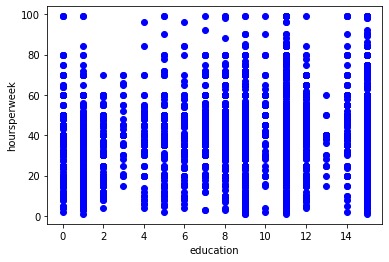

In [18]:
plt.plot(df1.education,df1.hoursperweek,"bo")
plt.xlabel("education")
plt.ylabel("hoursperweek") 

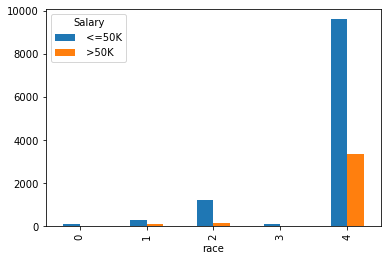

In [19]:
pd.crosstab(df1.race,df1.Salary).plot(kind="bar")

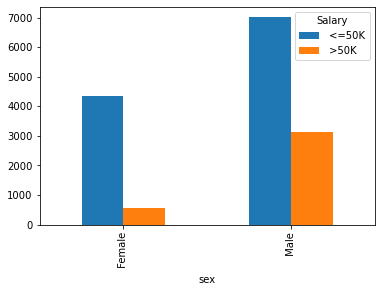

In [20]:
pd.crosstab(df.sex,df1.Salary).plot(kind="bar")

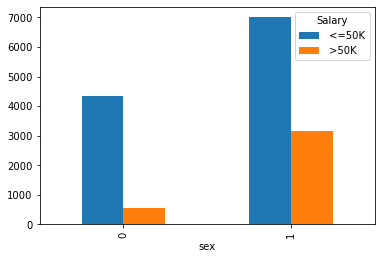

In [21]:
pd.crosstab(df1.sex,df1.Salary).plot(kind="bar")

In [60]:
# defining target and independent variables
X=df1.iloc[:,0:13]
y=df1.iloc[:,13]

In [64]:
#building the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [65]:
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [66]:
clf.score(X_test,y_test)

0.7690140845070422

In [67]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      3723
           1       0.62      0.20      0.31      1247

    accuracy                           0.77      4970
   macro avg       0.70      0.58      0.58      4970
weighted avg       0.74      0.77      0.72      4970



In [69]:
 import joblib
joblib.dump(clf, 'NB_spam_model.pkl')

['NB_spam_model.pkl']

In [70]:

NB_spam_model = open('NB_spam_model.pkl','rb')
clf = joblib.load(NB_spam_model)